In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict


%matplotlib notebook 



## Cross Validation

### Train- Test Split

In order to tune the model to find the structure in the data in the best possible fashion, we must use the existing data to identify settings for the model’s parameters that yield the best and most realistic predictive performance.

Traditionally, this has been achieved by splitting the existing data into training and test sets. The training set is used
to build and tune the model and the test set is used to estimate the model’s predictive performance. Modern approaches to model building split the data into multiple training and testing sets, which have been shown to often find more optimal tuning parameters and give a more accurate representation of the model’s predictive performance.

To avoid over-fitting, we use a general model building approach that encompasses model tuning and model evaluation
with the ultimate goal of finding the reproducible structure in the data. This approach entails splitting existing data into distinct sets for the purposes of tuning model parameters and evaluating model performance. The choice of data splitting method depends on characteristics of the existing data such as its size and structure.

Below is an example of how test train split can be done in python
 
take the code below and run it in the cell- 

```python 


#load boston dataset using boston_dataset.feature_names
boston_dataset = datasets.load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_data['MEDV'] = boston_dataset.target

#create X and y as input and output vectors
X = boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data[['MEDV']]

# Write code below to create train-test split
#Use sklearn.modelselection. train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.head()

```



In [ ]:
# run test train split code here 


In the above, example we took the boston dataset and broke it down into a test set with 30% of the examples and 70% of the examples in the training set. This breakdown allows us to train the model on the training set and run it on the test set. One should never train the model on examples in the training set. 

What does that mean? 

It means that for example, in the context of what we have learned so far, we should never run the fit function the test set data in linear regression. Just the predict function. 

We expect the test set metric scores, accuracy or mean squared error(in case of regression) to be a little bit more worse than than the training set accuracy score. This is because the test set has data the model has not seen before.  For example if your house price variation is say 10,000 dollars based on location and the test set has examples where that variation is far larger then the predicted value of the house price will be lower than the actual value in the test set. Hence, the mean squared error will be higher in the test set. 






When we have a large amount of data we can partition the data into three groups. Training data, validation set and test set. 
Typically we train the model on the training data then validate the model on the validation set and check if 

# Single fold cross validation - linear regression

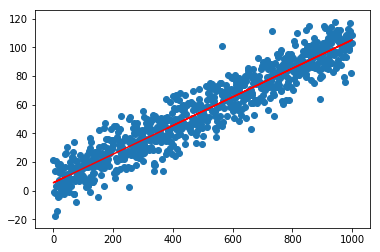

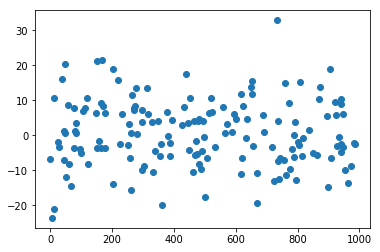

(89.86267004898397, 0.9032321407675079)

In [3]:
data = pd.read_csv("datasets_Regression/Linear_Regression_train.csv")
x = np.array(data["x"].tolist())
y_noised = np.array(data["y"].tolist())


x_train, x_test, y_train, y_test = train_test_split(x,y_noised, test_size=0.2, random_state=1)
x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)


x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)


# fitting the model in sklearn 

lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

pred_slope = lr.coef_
pred_b = lr.intercept_

# fitting the model line to the data 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
plt.figure()
plt.plot(x, model_line_reshaped, color="red")
plt.scatter(x, y_noised)

y_pred= lr.predict(x_test_reshaped)

residuals = y_test - y_pred.reshape(y_pred.shape[0],)
plt.figure()
plt.scatter(x_test,residuals)
plt.show()

mean_squared_error(y_test,  y_pred.reshape(y_pred.shape[0],)), r2_score(y_test,  y_pred.reshape(y_pred.shape[0],))

# K fold cross - Linear regression


In [4]:
lr_cv = LinearRegression()
scoring = {'mse':make_scorer(mean_squared_error, greater_is_better=True),'r2':'r2' }
cross_validate(lr_cv, x_train_reshaped, y_train_reshaped, cv=5, scoring=scoring)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_mse'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00188088, 0.        , 0.00099945, 0.00133133, 0.00199986]),
 'score_time': array([0.00201416, 0.00099921, 0.00203252, 0.00200057, 0.        ]),
 'test_mse': array([ 83.64356968, 106.13867991, 116.51786106, 108.54590537,
         83.81459414]),
 'train_mse': array([103.47646256,  97.73200335,  95.12752525,  97.10143265,
        103.28265119]),
 'test_r2': array([0.90303021, 0.8921751 , 0.86726517, 0.88932955, 0.90181404]),
 'train_r2': array([0.88946046, 0.89200795, 0.89759605, 0.8923322 , 0.88944251])}

In [10]:
cross_val_predict(lr_cv, x_test_reshaped, y_test_reshaped, cv=10)

NameError: name 'y_test_reshaped' is not defined